## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

## 0.1
Although they are both instances of supervised learning (where the data used to train the model has labels), regression is a task where the model is trying to predict a (quantitative) value, while classification is a task where the goal is to predict a label, or in other words map input to a class.

## 0.2
A confusion table is a table displaying the true positives, false positives, true negatives, and false negatives. This is essentially a cross-tabbing of your predicted classes against the actual classes. This can help us understand a model's performance since it compares the number of values the model is able to predict correctly verus wrong. With the false positives and false negatives being split, these metrics can be insightful in cases where a false negative is much more detrimental than a false positive (for example, falsely predicting a hurricane is coming when it doesn't is less detrimental than saying that a hurricane is not coming when it actually is).

## 0.3
The SSE (or sum squared error) is a measure of error / how close or far the models' predictions are from the ground truth. The SSE is found by calculated by finding the difference between the predicted and actual values, squaring that difference, and adding that value across all predicted values.

## 0.4
- Underfitting is when the model is not able to "learn" the trends/information from the data because the model is too simple for the data.
- Overfitting is when the model "memorizes" a particular dataset's information/features and thus is unable to generalize on other datasets.

## 0.5
Splitting the data into training and testing sets helps to prevent overfitting and underfitting. By having a training and test set, we can train the model just using the training set, and then use the model on the test set to truly evaluate whether the model is able to gain insights on the data and predict correctly, while also testing that it is able to generalize to data it hasn't seen yet.

## 0.6
Class labels as a prediction are easily interpreted, but you may be missing valuable insights



**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   year  mileage  price
0  2008   274117   6300
1  2011   190552   2899
2  2018    39590   5350
3  2014    64146  25000
4  2018     6654  27700
              year       mileage         price
count  2499.000000  2.499000e+03   2499.000000
mean   2016.714286  5.229869e+04  18767.671469
std       3.442656  5.970552e+04  12116.094936
min    1973.000000  0.000000e+00      0.000000
25%    2016.000000  2.146650e+04  10200.000000
50%    2018.000000  3.536500e+04  16900.000000
75%    2019.000000  6.347250e+04  25555.500000
max    2020.000000  1.017936e+06  84900.000000
There are no missing values


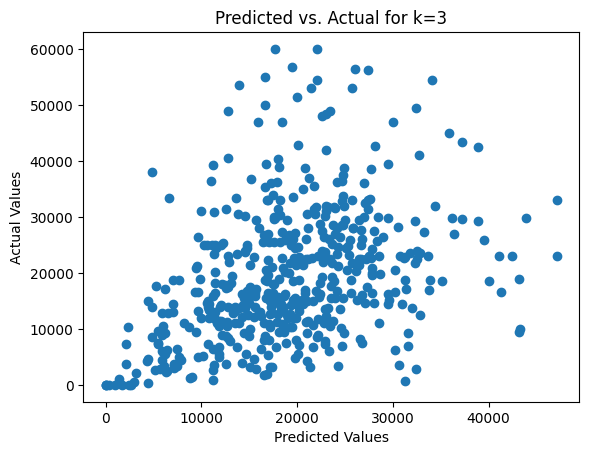

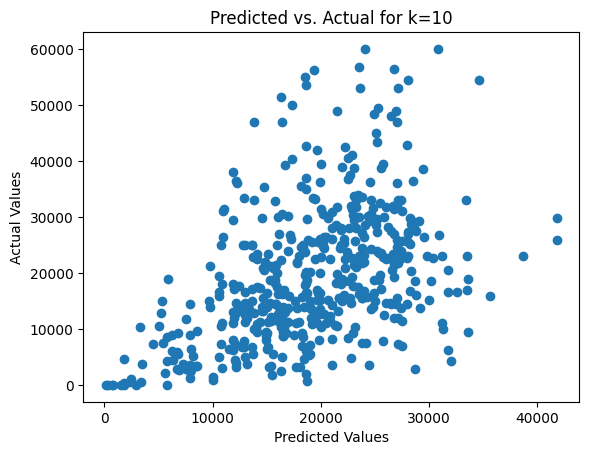

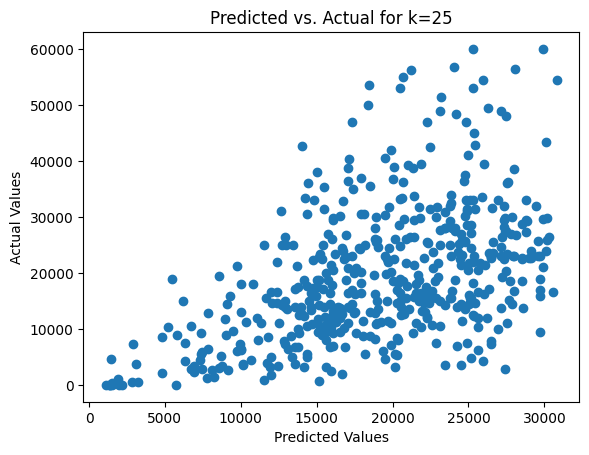

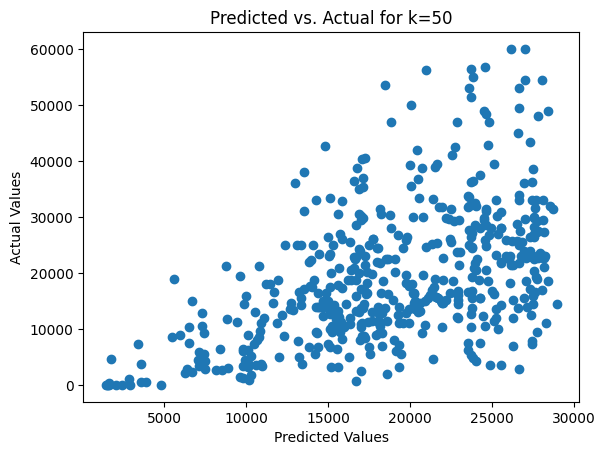

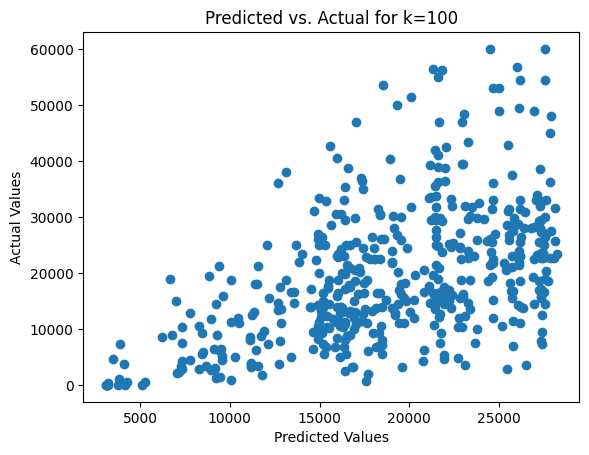

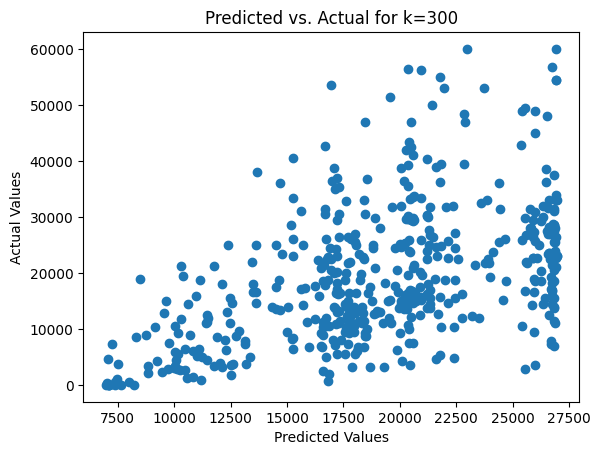

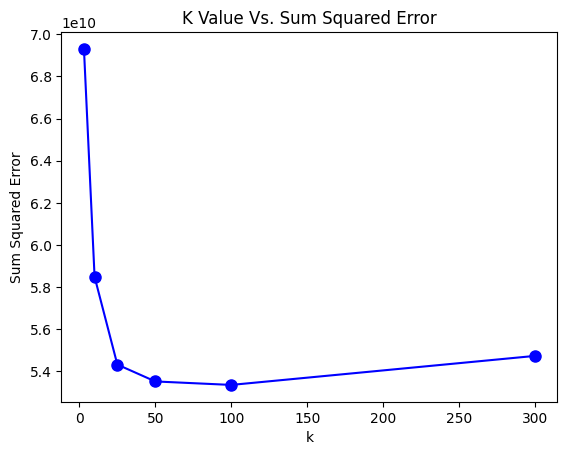

In [5]:
import pandas as pd
import numpy as np

# Question 1
def load_USA_cars():
    return pd.read_csv("data/USA_cars_datasets.csv")

dataset = load_USA_cars()
cleaned_data1 = dataset[['year', 'mileage','price']]
#cleaned_data1.isnull().sum()
print(cleaned_data1.head())
print(cleaned_data1.describe())
print("There are no missing values")

# Question 2
def max_min(column):
    col_min = min(column)
    col_max = max(column)
    denominator = col_max-col_min
    new_column = ((column-col_min) / denominator)
    return new_column

cleaned_data2 = cleaned_data1.copy()
cleaned_data2['year'] = max_min(cleaned_data1['year'])
cleaned_data2['mileage'] = max_min(cleaned_data1['mileage'])

# Question 3
from sklearn.model_selection import train_test_split
y = cleaned_data2['price']
X = cleaned_data2.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2 ,random_state=21) # 20 percent is test

# Question 4
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def find_sse(x,y):
    return np.sum(((x-y)**2))


def plot_scatter(predicted, actual, k):
    plt.scatter(predicted, actual)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title(f"Predicted vs. Actual for k={k}")
    plt.show()

sse_all = []
for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # y_hat are your predicted values
    sse = find_sse(y_hat, y_test) # compare predicated values w/ actual values
    plot_scatter(y_hat,y_test, k)
    sse_all.append(sse)

plt.plot([3,10,25,50,100,300], sse_all, 'bo-', markersize=8)
plt.title("K Value Vs. Sum Squared Error")
plt.xlabel("k")
plt.ylabel("Sum Squared Error")
plt.show()


## Paragraph answer
As k increases to 100, the scatterplots of the predicted values on the actual values get closer to a y=x line, indicating the model is able to predict closer to the expected value, or in other words predict more accurately. At k=300 though, we see that we have strayed away from this y=x line indicating that the model was not as accurate as when k=100.

The optimal k for these data is k=100 as seen from my plot of the sum squared error plotted against the respective k-value. At k=100, we had the lowest sum squared error, indicating this was the optimal k value. k=50 had only a slightly higher SSE than k=100 indicating it is able generalize the solution, just not as well as when k=100.

Looking at the scatterplots of the predicted vs. actual values, for k=3,10,25 the model is very underfitted and the model is unable to predict the X_test set as accurately as when the k is optimal. For k=50 and k=100, I would say the model is not under or overfitted.  
In the k=300 scatterplot of the predicted vs. actual values, it moves away from the shape of a y=x line and produces a higher SSE indicating the model was not as accurate as the previous k=100 model. This is due to overfitting, as this k=300 model was not able to generalize the solution to fit datapoints it has not seen yet (X_test).



**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

Class: 1
['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']
Class: 2
['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk', 'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']
Class: 3
['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara']
Class: 4
['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock', 'herring', 'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna']
Class: 5
['frog', 'newt', 'toad']
Class: 6
['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth', 'termite', 'wasp']
Class: 7
['clam', 'crab', 'crayfish', 'lobster', 'octo

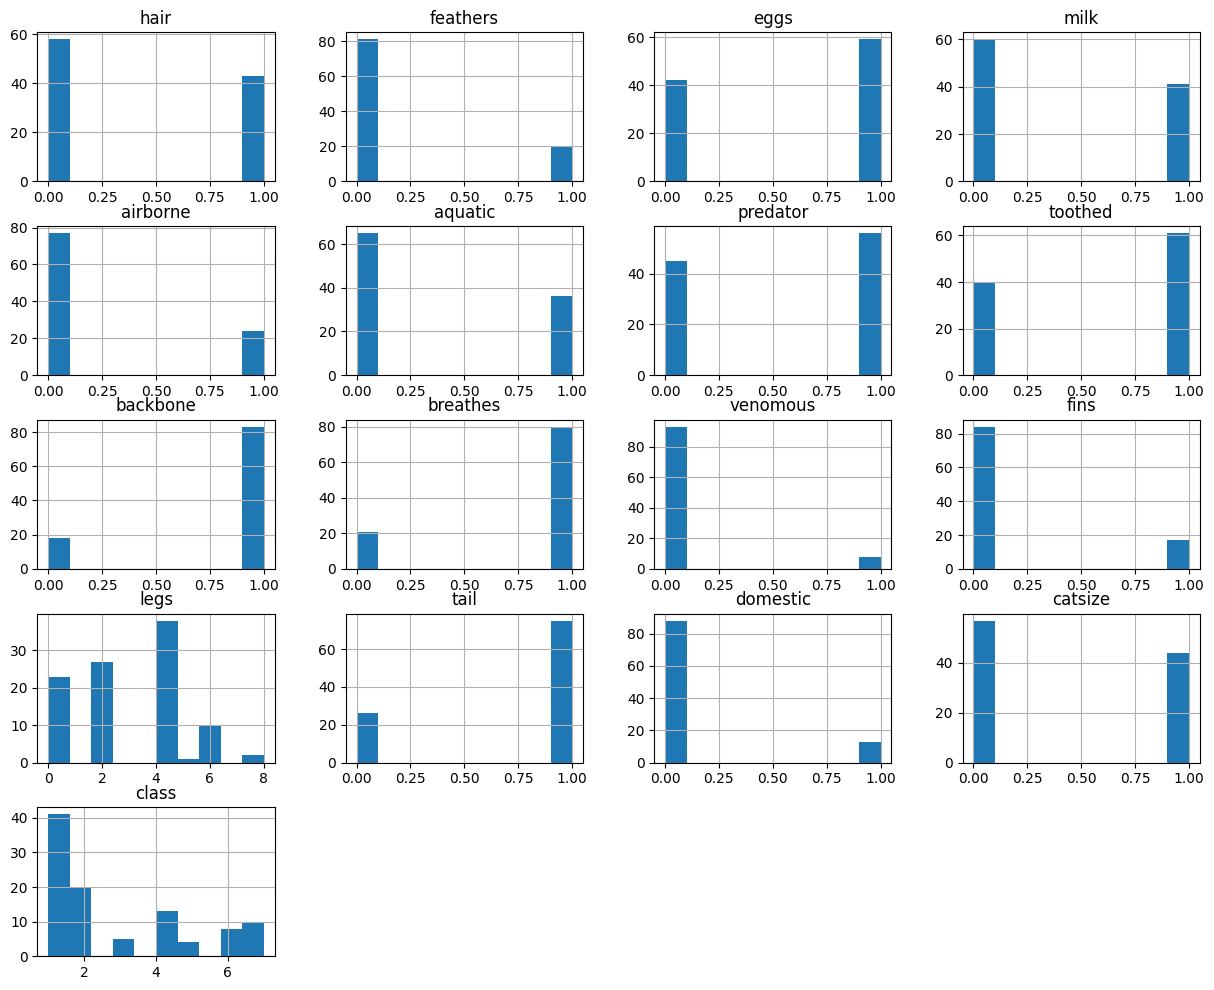

0.9411764705882353
[1]


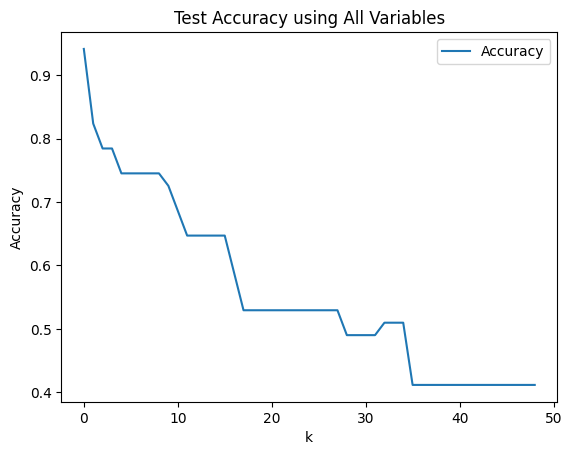

All variables, confusion table:
class   1  2  3  4  5  6  7
row_0                      
1      21  0  0  0  0  0  0
2       0  8  0  0  0  0  0
3       0  0  2  0  1  0  0
4       0  0  1  6  0  0  0
5       0  0  0  0  1  0  1
6       0  0  0  0  0  5  0
7       0  0  0  0  0  0  5
0.6666666666666666
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]


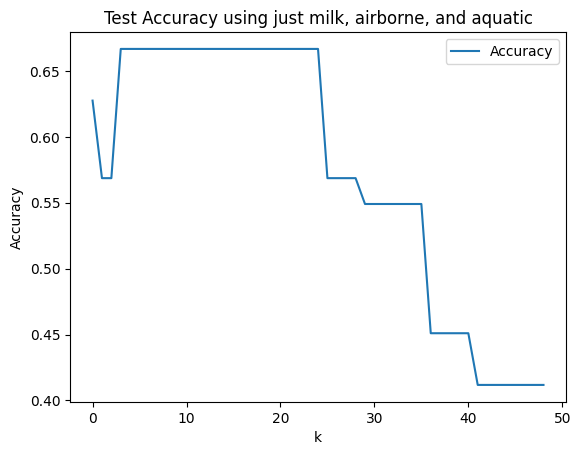

Just milk airborne and aquatic variables, confusion table:
class   1  2  3  4  5  6  7
row_0                      
1      21  0  0  0  0  0  0
2       0  7  3  0  0  5  2
4       0  1  0  6  2  0  4
[1 2 4]


array([[0.  , 0.75, 0.  , 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.5 , 0.  , 0.  ],
       [0.  , 0.25, 0.25, 0.  , 0.  , 0.25, 0.25],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.5 , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.  , 0.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.25, 0.25, 0.  , 0.  , 0.25, 0.25],
       [0.  , 0.5 , 0.  , 0.  , 0.  , 0.5 , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.5 , 0.  , 0.  ],
       [0.  , 0.5 , 0.  , 0.  , 0.  , 0.5 , 0.  ],
       [0.  , 0.5 , 0.  , 0.  , 0.  , 0.5 , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ,

In [79]:
import matplotlib.pyplot as plt

def load_animals():
    return pd.read_csv("data/zoo.csv")

animal_dataset = load_animals()
class_values = list(animal_dataset['class'].unique())

for i in range(1,8):
  print(f"Class: {i}")
  print(list(animal_dataset[animal_dataset['class'] == i]['animal'].unique()))
# Class 1: Mammals, Class 2: Birds, Class 3: Reptiles, Class 4: Types of Fish,
# Class 5: Amphibians, Class 6: Bugs, Class 7: Invertebrates

animal_dataset.hist(figsize=(15,12))
plt.show()

# STEP 2
from sklearn.model_selection import train_test_split
X = animal_dataset.drop(['class','animal'],axis=1)
y = animal_dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5 ,random_state=21) # 50 percent is test

# STEP 3
from sklearn.neighbors import KNeighborsClassifier

N_train = len(y_train)
N_test = len(y_test)

## Solve for k that maximizes accuracy:
k_bar = N_train-1 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # starting from k=1
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc[k] = np.sum( y_hat == y_test )/N_test

Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # optimal value for k, started from k=1 insteaad of k=0 so +1
print(Acc_max)
print(k_star)

# Fit with the optimal k value
model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)

# Accuracy Graph
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy using All Variables')
plt.show()

## STEP 4: Confusion Table
print('All variables, confusion table:')
print(pd.crosstab(y_hat, y_test))


# STEP 5
animal_dataset = load_animals()
X = animal_dataset[['milk', 'airborne', 'aquatic']]
y = animal_dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5 ,random_state=21)

N_train = len(y_train)
N_test = len(y_test)

## Solve for k that maximizes accuracy:
k_bar = N_train-1 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # starting from k=1
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc[k] = np.sum( y_hat == y_test )/N_test

Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # optimal value for k, started from k=1 insteaad of k=0 so +1
print(Acc_max)
print(k_star)

# Fit with the optimal k value
model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)

# Accuracy Graph
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy using just milk, airborne, and aquatic')
plt.show()

## STEP 4: Confusion Table
print('Just milk airborne and aquatic variables, confusion table:')
print(pd.crosstab(y_hat, y_test))

print(np.unique(y_hat))
model.predict_proba(X_test.values)


Class 3 is not being predicted in my model. I believe it is because we are using the classifier approach and we only selected 3 variables. Looking at the probabilities, there are low probabilities that would show up as empty in the confusion table.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

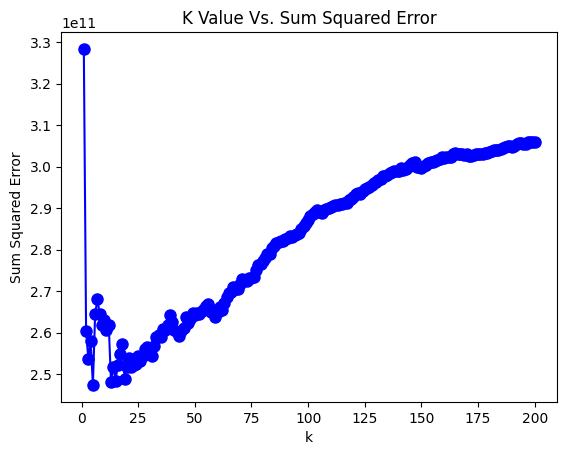

[5]
247395511543.06424


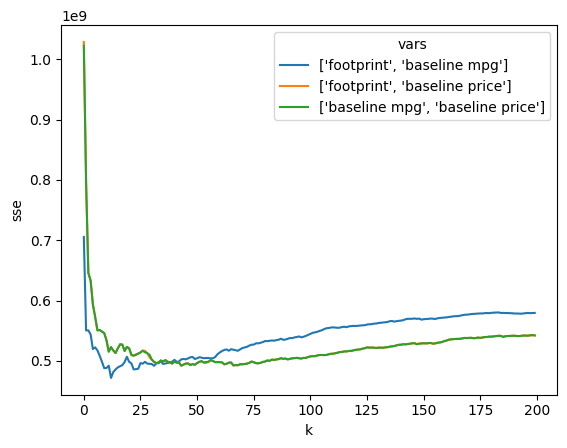

['footprint', 'baseline mpg']
471812994.6184003
['footprint', 'baseline price']
492121207.3441819
['baseline mpg', 'baseline price']
492031622.85803163


In [92]:
from math import comb
def load_cars_env():
    return pd.read_csv("data/cars_env.csv")

cars = load_cars_env()
y = cars['baseline sales']
X = cars[['footprint','baseline mpg','baseline price']]

def max_min(column):
    col_min = min(column)
    col_max = max(column)
    denominator = col_max-col_min
    new_column = ((column-col_min) / denominator)
    return new_column

X = X.apply(max_min)
# does not make sense to normalize y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3 ,random_state=21) # 20 percent is test


from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

def find_sse(x,y):
    return np.sum(((x-y)**2))

def plot_scatter(predicted, actual, k):
    plt.scatter(predicted, actual)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title(f"Predicted vs. Actual for k={k}")
    plt.show()

sse_all = []
for k in range(1,201):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # y_hat are your predicted values
    sse = find_sse(y_hat, y_test) # compare predicated values w/ actual values
    sse_all.append(sse)

plt.plot(range(1,201), sse_all, 'bo-', markersize=8)
plt.title("K Value Vs. Sum Squared Error")
plt.xlabel("k")
plt.ylabel("Sum Squared Error")
plt.show()

SSE_min = np.min(sse_all) # Find lowest recorded SSE
min_index = np.where(sse_all==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1
print(k_star)
print(SSE_min)


# STEP 5
comb_1 = ['footprint','baseline mpg']
comb_2 = ['footprint', 'baseline price']
comb_3 = ['baseline mpg','baseline price']

kgrid = range(1,201)
SSE_results = []
y_hat_results = []
for comb in [comb_1, comb_2, comb_3]:
    X = cars[comb]
    y = cars['baseline sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3 ,random_state=21) # 20 percent is test
    SSE = np.zeros(len(kgrid)) # We'll store the SSE here
    for k in range(len(kgrid)):
        model = KNeighborsRegressor(n_neighbors=kgrid[k]) # Create a sk model for k
        fitted_model = model.fit(X_train,y_train) # Train the model on our data
        y_hat = fitted_model.predict(X_test) # Predict values for test set
        y_hat_results.append(y_hat)
        SSE_results.append( {'sse':np.sum( (y_test-y_hat)**2)/len(y),
                            'vars':str(comb),
                            'k':k} )

gdf = pd.DataFrame.from_dict(SSE_results)

sns.lineplot(y='sse',x='k',data=gdf,hue='vars')
plt.show()
print(comb_1)
print( np.min( gdf.loc[gdf['vars'] == str(comb_1),'sse']))
print(comb_2)
print( np.min( gdf.loc[gdf['vars'] == str(comb_2),'sse']))
print(comb_3)
print( np.min( gdf.loc[gdf['vars'] == str(comb_3),'sse']))



The combination of footprint and baseline mpg as neighbors has the lowest error, signifying it may be the best at predicting sales.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

Mine Type: 1
         voltage     height       soil  mine_type
count  71.000000  71.000000  71.000000       71.0
mean    0.296463   0.495519   0.492958        1.0
std     0.031672   0.315962   0.341143        0.0
min     0.229607   0.000000   0.000000        1.0
25%     0.273096   0.227273   0.200000        1.0
50%     0.296586   0.454545   0.400000        1.0
75%     0.320241   0.727273   0.800000        1.0
max     0.365861   1.000000   1.000000        1.0
Mine Type: 2
         voltage     height       soil  mine_type
count  70.000000  70.000000  70.000000       70.0
mean    0.721123   0.487013   0.508571        2.0
std     0.222267   0.310720   0.345045        0.0
min     0.362537   0.000000   0.000000        2.0
25%     0.505286   0.204545   0.200000        2.0
50%     0.714501   0.454545   0.600000        2.0
75%     0.998488   0.727273   0.800000        2.0
max     0.999999   1.000000   1.000000        2.0
Mine Type: 3
         voltage     height       soil  mine_type
count  66.0

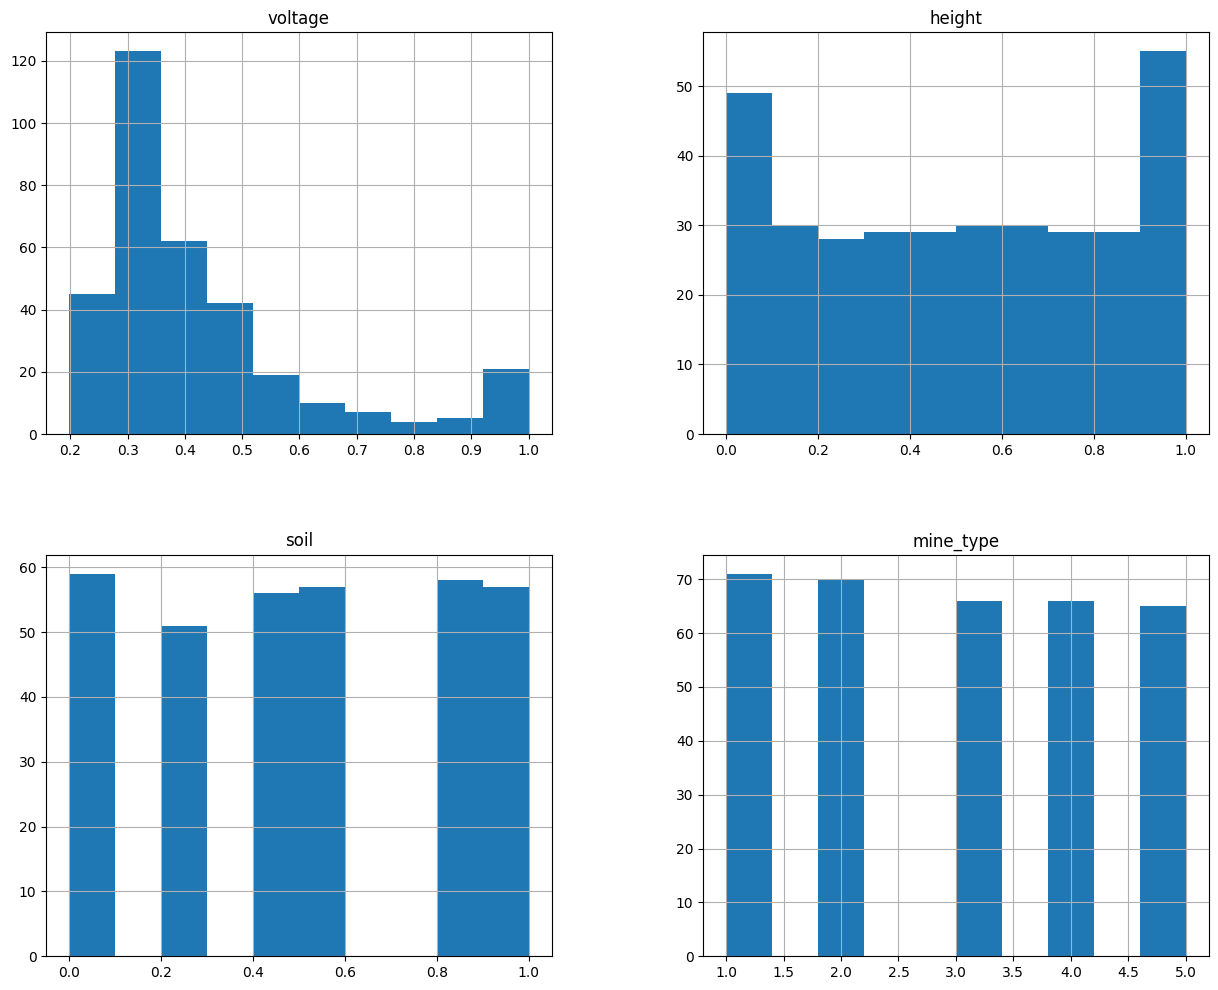

0.42011834319526625
[2]


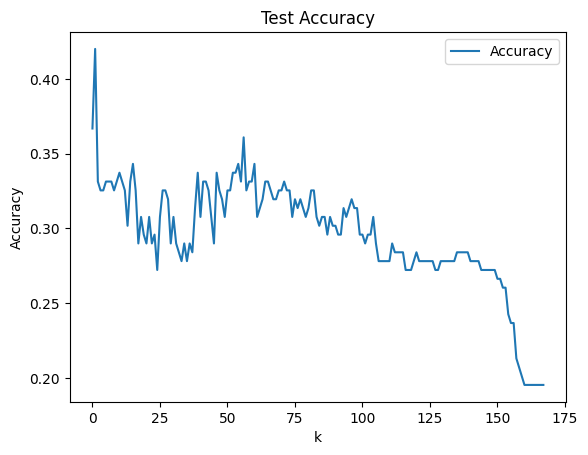

Confusion table:
mine_type   1   2   3   4   5
row_0                        
1          20   0  12  10  14
2           0  28   2   5   2
3           7   3  10   6  12
4           4   5   9  12   3
5           2   0   1   1   1


In [98]:
def load_land_mines():
    return pd.read_csv("data/land_mines.csv")

mines = load_land_mines()
class_values = list(mines['mine_type'].unique())

for i in range(1,6):
  print(f"Mine Type: {i}")
  print((mines[mines['mine_type'] == i]).describe())
# Class 1: Mammals, Class 2: Birds, Class 3: Reptiles, Class 4: Types of Fish,
# Class 5: Amphibians, Class 6: Bugs, Class 7: Invertebrates

mines.hist(figsize=(15,12))
plt.show()

# STEP 2
from sklearn.model_selection import train_test_split
X = mines.drop(['mine_type'],axis=1)
y = mines['mine_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5 ,random_state=21) # 50 percent is test

# STEP 3
from sklearn.neighbors import KNeighborsClassifier

N_train = len(y_train)
N_test = len(y_test)

## Solve for k that maximizes accuracy:
k_bar = N_train-1 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # starting from k=1
    fitted_model = model.fit(X_train.values,y_train)
    y_hat = fitted_model.predict(X_test.values)
    Acc[k] = np.sum( y_hat == y_test )/N_test

Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
k_star = max_index[0]+1 # optimal value for k, started from k=1 insteaad of k=0 so +1
print(Acc_max)
print(k_star)

# Fit with the optimal k value
model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values)

# Accuracy Graph
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

## STEP 4: Confusion Table
print('Confusion table:')
print(pd.crosstab(y_hat, y_test))


The maximum accuracy is only 42% so I would advise them to not soley rely on this model. For identifying mines of type 2, the model has better accuracy rate based on the ones it classified, but mines are pretty important to get right since they are affecting human lives, so my original statement would still stand.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64
serum_creatinine and age have the highest correlation (and ejection_fraction as a negative correlator) to death event although none of the variables have too high of a correlation

Proportion of DEATH_EVENT grouped by anaemia:
anaemia
0    0.294118
1    0.356589
Name: DEATH_EVENT, dtype: float64

Proportion of DEATH_EVENT grouped by diabetes:
diabetes
0    0.321839
1    0.320000
Name: DEATH_EVENT, dtype: float64

Proportion of DEATH_EVENT grouped by high_blood_pressure:
high_blood_pressure
0    0.293814
1    0.371429

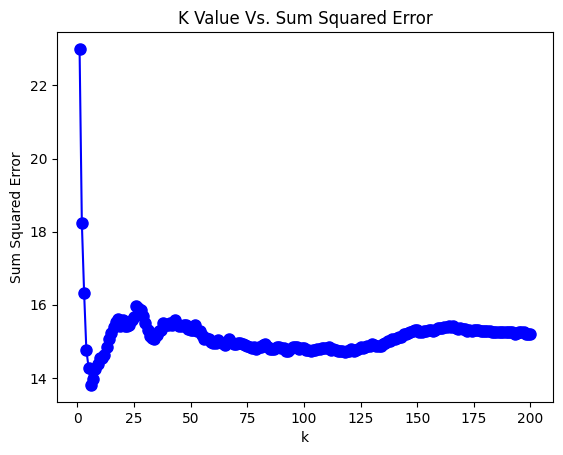

[6]
13.805555555555555


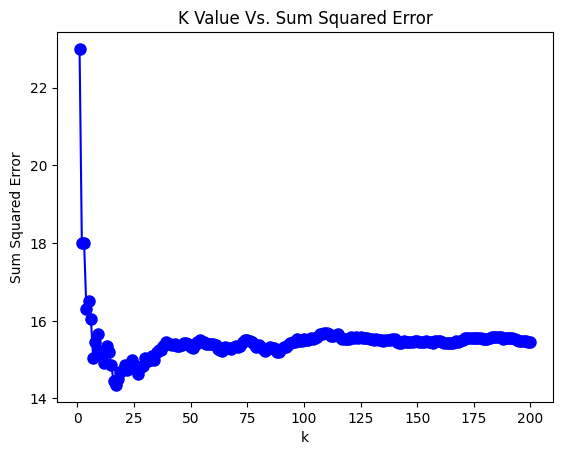

[17]
14.349480968858131


In [109]:
def load_heart_failure():
    return pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

heart = load_heart_failure()
heart = heart.drop('time',axis=1)
print(heart.corr()['DEATH_EVENT'].sort_values())
print("serum_creatinine and age have the highest correlation (and ejection_fraction as a negative correlator) to death event although none of the variables have too high of a correlation")

vars = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for var in vars:
    summary = heart.groupby(var)['DEATH_EVENT'].mean()
    print(f"\nProportion of DEATH_EVENT grouped by {var}:\n{summary}")

y = heart['DEATH_EVENT']
rel_vars = ['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']
X = heart.loc[:,rel_vars]

X = X.apply(max_min)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

sse_all = []
for k in range(1,201):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # y_hat are your predicted values
    sse = find_sse(y_hat, y_test) # compare predicated values w/ actual values
    sse_all.append(sse)

plt.plot(range(1,201), sse_all, 'bo-', markersize=8)
plt.title("K Value Vs. Sum Squared Error")
plt.xlabel("k")
plt.ylabel("Sum Squared Error")
plt.show()

SSE_min = np.min(sse_all) # Find lowest recorded SSE
min_index = np.where(sse_all==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1
print(k_star)
print(SSE_min)


y = heart['DEATH_EVENT']
X = heart.drop('DEATH_EVENT', axis=1)

X = X.apply(max_min)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

sse_all = []
for k in range(1,201):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # y_hat are your predicted values
    sse = find_sse(y_hat, y_test) # compare predicated values w/ actual values
    sse_all.append(sse)

plt.plot(range(1,201), sse_all, 'bo-', markersize=8)
plt.title("K Value Vs. Sum Squared Error")
plt.xlabel("k")
plt.ylabel("Sum Squared Error")
plt.show()

SSE_min = np.min(sse_all) # Find lowest recorded SSE
min_index = np.where(sse_all==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1
print(k_star)
print(SSE_min)


With the fewer variables, it takes less k values to fit the data and reachest a lower error. With fewer variables, it is easier to overfit the data though so selecting the right k is more important. More variables does not mean a more accurate model, it is more important that the variables actually mean something to the value you are trying to predict.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

The best value for k is: 121
Minimum SSE: 71.60508111010625
The imputed values are more compressed than the real ones.
the distributions look similar, suggesting that the model was able to predict missing ratings that follow a similar pattern to the actual ratings


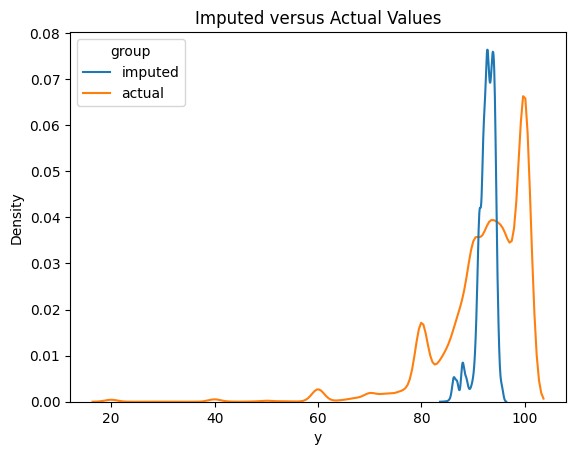

In [130]:
def load_airbnb():
    return pd.read_csv("data/airbnb_hw.csv")

airbnb = load_airbnb()
airbnb = airbnb.loc[:,['Review Scores Rating','Price','Beds'] ]
airbnb['Price'] = airbnb['Price'].str.replace(',','')
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

missing_reviews = airbnb[airbnb['Review Scores Rating'].isnull()]
airbnb = airbnb.dropna(axis=0, how='any')

X = airbnb[['Price', 'Beds']]
y = airbnb['Review Scores Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Range of k values to try
k_values = range(1, 201)  # Testing k from 1 to 200
sse = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    sse.append(mean_squared_error(y_test, y_pred))


best_k = k_values[sse.index(min(sse))]+1
print(f"The best value for k is: {best_k}")
print(f"Minimum SSE: {min(sse)}")

knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X, y)
missing_reviews = missing_reviews[['Price', 'Beds']]
missing_reviews = missing_reviews.dropna(axis=0,how='any')
missing_reviews_pred = knn_final.predict(missing_reviews)


imputed = pd.DataFrame.from_dict({ 'y':missing_reviews_pred,'group':'imputed'})
true = pd.DataFrame.from_dict({'y':airbnb['Review Scores Rating'],'group':'actual'})
gdf = pd.concat([imputed,true],axis=0)

sns.kdeplot(x='y',hue='group',data=gdf)
plt.title('Imputed versus Actual Values')

print('The imputed values are more compressed than the real ones.')
print('the distributions look similar, suggesting that the model was able to predict missing ratings that follow a similar pattern to the actual ratings')